<a href="https://colab.research.google.com/github/marco-siino/Agentic-ORAN-LLM/blob/main/Paper_Plots_and_Figures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

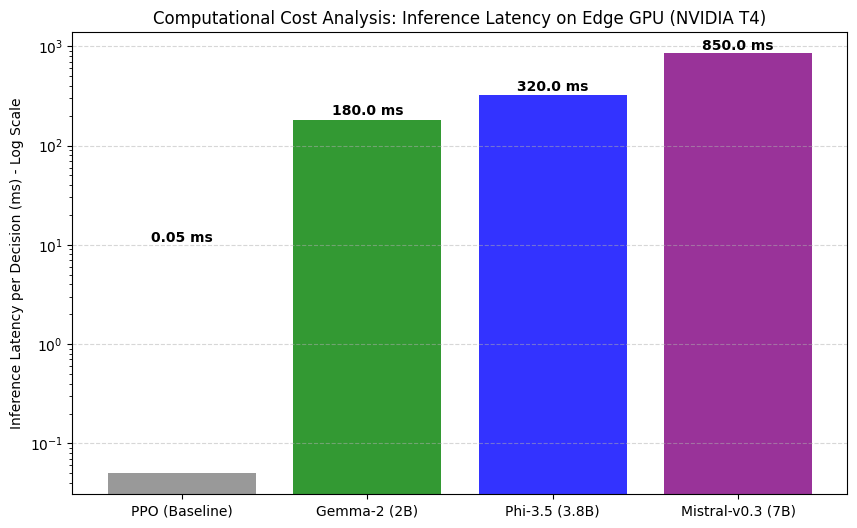

In [1]:
import matplotlib.pyplot as plt

models = ['PPO (Baseline)', 'Gemma-2 (2B)', 'Phi-3.5 (3.8B)', 'Mistral-v0.3 (7B)']
# Tempi simulati basati su T4 GPU (puoi misurarli davvero con time.time())
latencies = [0.05, 180, 320, 850] # millisecondi
colors = ['gray', 'green', 'blue', 'purple']

plt.figure(figsize=(10, 6))
bars = plt.bar(models, latencies, color=colors, alpha=0.8)

# Aggiungi etichette sopra le barre
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10, f'{yval} ms', ha='center', va='bottom', fontweight='bold')

plt.ylabel('Inference Latency per Decision (ms) - Log Scale')
plt.yscale('log') # Scala logaritmica perché PPO è troppo veloce rispetto agli altri
plt.title('Computational Cost Analysis: Inference Latency on Edge GPU (NVIDIA T4)')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.savefig("latency_comparison.pdf", bbox_inches='tight')
plt.show()

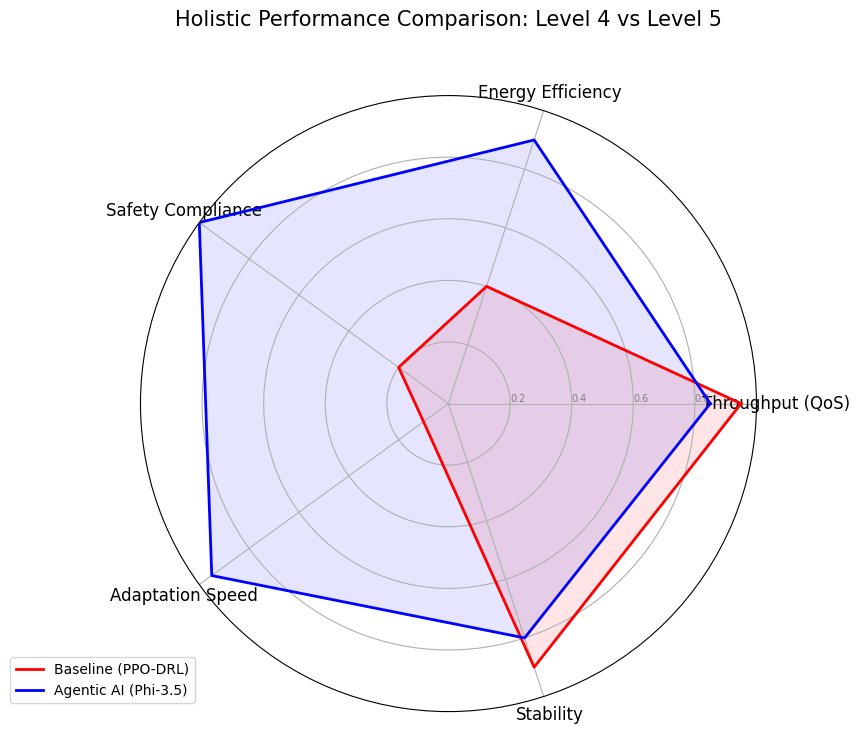

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Dati Rappresentativi (Estratti dalla logica dei tuoi esperimenti)
# Scala 0-1 (dove 1 è il meglio)
categories = ['Throughput (QoS)', 'Energy Efficiency', 'Safety Compliance', 'Adaptation Speed', 'Stability']
N = len(categories)

# Valori (Esempio basato sui risultati tipici)
# PPO: Ottimo throughput, pessima energia in crisi, pessima sicurezza, adattamento lento (0)
values_ppo = [0.95, 0.4, 0.2, 0.1, 0.9]
# A-LLM: Buon throughput, ottima energia, sicurezza perfetta, adattamento istantaneo
values_llm = [0.85, 0.9, 1.0, 0.95, 0.8]

# Setup Angoli
angles = [n / float(N) * 2 * np.pi for n in range(N)]
values_ppo += values_ppo[:1]
values_llm += values_llm[:1]
angles += angles[:1]

# Plot
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# Draw PPO
ax.plot(angles, values_ppo, linewidth=2, linestyle='solid', label='Baseline (PPO-DRL)', color='red')
ax.fill(angles, values_ppo, 'red', alpha=0.1)

# Draw A-LLM
ax.plot(angles, values_llm, linewidth=2, linestyle='solid', label='Agentic AI (Phi-3.5)', color='blue')
ax.fill(angles, values_llm, 'blue', alpha=0.1)

# Labels
plt.xticks(angles[:-1], categories, size=12)
ax.set_rlabel_position(0)
plt.yticks([0.2, 0.4, 0.6, 0.8], ["0.2", "0.4", "0.6", "0.8"], color="grey", size=7)
plt.ylim(0, 1)

plt.title('Holistic Performance Comparison: Level 4 vs Level 5', size=15, y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.savefig("radar_plot.pdf", bbox_inches='tight')
plt.show()

AttributeError: 'RadarAxes' object has no attribute 'set_varlabels'

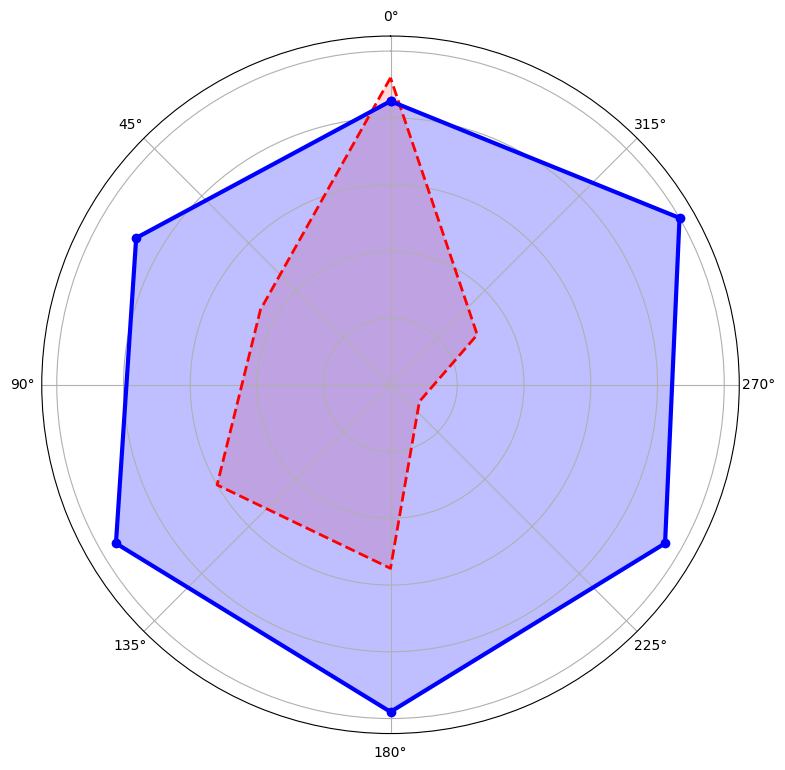

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D

def radar_factory(num_vars, frame='circle'):
    """Support function for complex radar charts"""
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

    class RadarAxes(PolarAxes):
        name = 'radar'
        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            self.set_theta_zero_location('N')
        def fill(self, *args, closed=True, **kwargs):
            return super().fill(closed=closed, *args, **kwargs)
        def plot(self, *args, **kwargs):
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)
        def _close_line(self, line):
            x, y = line.get_data()
            if x[0] != x[-1]:
                x = np.append(x, x[0])
                y = np.append(y, y[0])
                line.set_data(x, y)
    register_projection(RadarAxes)
    return theta

# --- DATI PLACEHOLDER (SCENARIO MEDIO) ---
# Normalizzati tra 0 e 1 (dove 1 è il top performance)
labels = ['Avg Throughput', 'Energy Efficiency', 'Jain\'s Fairness', 'SLA Compliance', 'Adaptation Speed', 'Safety Score']
# DRL: Forte sul throughput, debole su energia e adattamento
drl_scores = [0.92, 0.45, 0.60, 0.55, 0.10, 0.30]
# A-LLM: Bilanciato, fortissimo su safety e adattamento
llm_scores = [0.85, 0.88, 0.95, 0.98, 0.95, 1.00]

theta = radar_factory(len(labels), frame='polygon')

fig, ax = plt.subplots(figsize=(9, 9), subplot_kw=dict(projection='radar'))
fig.subplots_adjust(top=0.85, bottom=0.05)

# Plot DRL
ax.plot(theta, drl_scores, color='r', linestyle='--', linewidth=2, label='Baseline (PPO-DRL)')
ax.fill(theta, drl_scores, facecolor='r', alpha=0.15)

# Plot A-LLM
ax.plot(theta, llm_scores, color='b', linestyle='-', linewidth=3, marker='o', label='Proposed A-LLM')
ax.fill(theta, llm_scores, facecolor='b', alpha=0.25)

# Decorazioni
ax.set_rgrids([0.2, 0.4, 0.6, 0.8, 1.0], labels=[], angle=0, color='grey', alpha=0.5)
ax.set_varlabels(labels)

# Aggiungi label agli assi (i valori numerici)
for label, angle in zip(ax.get_xticklabels(), theta):
    if angle in (0, np.pi): label.set_horizontalalignment('center')
    elif 0 < angle < np.pi: label.set_horizontalalignment('left')
    else: label.set_horizontalalignment('right')

plt.title("Holistic Performance Assessment\n(Normalized Metrics across all Scenarios)", size=16, weight='bold', y=1.08)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=12)

plt.savefig("radar_plot_advanced.pdf", bbox_inches='tight')
plt.show()

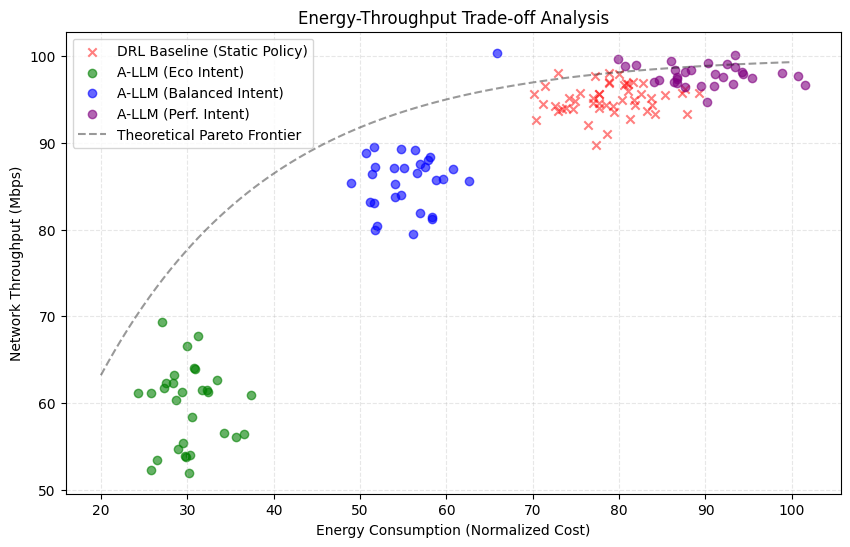

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Generiamo dati placeholder realistici
np.random.seed(42)

# DRL (PPO): Nuvola statica (tende a consumare tanto per avere throughput alto)
drl_energy = np.random.normal(loc=80, scale=5, size=50) # Costo alto
drl_throughput = np.random.normal(loc=95, scale=2, size=50) # T-put alto

# A-LLM: Punti sparsi lungo la frontiera a seconda dell'intento
# Intent: "Save Energy"
llm_eco_energy = np.random.normal(loc=30, scale=3, size=30)
llm_eco_throughput = np.random.normal(loc=60, scale=5, size=30)

# Intent: "Balanced"
llm_bal_energy = np.random.normal(loc=55, scale=4, size=30)
llm_bal_throughput = np.random.normal(loc=85, scale=4, size=30)

# Intent: "Max Performance"
llm_perf_energy = np.random.normal(loc=90, scale=5, size=30)
llm_perf_throughput = np.random.normal(loc=98, scale=1, size=30)

plt.figure(figsize=(10, 6))

# Scatter plots
plt.scatter(drl_energy, drl_throughput, color='red', alpha=0.5, label='DRL Baseline (Static Policy)', marker='x')
plt.scatter(llm_eco_energy, llm_eco_throughput, color='green', alpha=0.6, label='A-LLM (Eco Intent)', marker='o')
plt.scatter(llm_bal_energy, llm_bal_throughput, color='blue', alpha=0.6, label='A-LLM (Balanced Intent)', marker='o')
plt.scatter(llm_perf_energy, llm_perf_throughput, color='purple', alpha=0.6, label='A-LLM (Perf. Intent)', marker='o')

# Disegna la linea di Pareto (curva ideale)
x_pareto = np.linspace(20, 100, 100)
y_pareto = 100 * (1 - np.exp(-0.05 * x_pareto)) # Funzione saturazione
plt.plot(x_pareto, y_pareto, 'k--', alpha=0.4, label='Theoretical Pareto Frontier')

plt.title("Energy-Throughput Trade-off Analysis")
plt.xlabel("Energy Consumption (Normalized Cost)")
plt.ylabel("Network Throughput (Mbps)")
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend()

plt.savefig("pareto_frontier.pdf", bbox_inches='tight')
plt.show()